In [3]:
import os
import pandas as pd
import numpy as np

# Define data path and save path
data_path = r"E:\PKNU_Data_2025\Aanlysis\Aanlysis_5nos\Test_data_2"
save_path = r"E:\PKNU_Data_2025\Aanlysis\Aanlysis_5nos\IMU\Angle_data"

# Ensure save directory exists
os.makedirs(save_path, exist_ok=True)

# List all Excel files in the directory
excel_files = [f for f in os.listdir(data_path) if f.endswith('.xlsx')]

# Define function to compute roll and pitch angles
def compute_angles(df):
    required_columns = ['L_AccX', 'L_AccY', 'L_AccZ', 'R_AccX', 'R_AccY', 'R_AccZ']
    
    # Check if all required columns exist
    missing_cols = [col for col in required_columns if col not in df.columns]
    if missing_cols:
        print(f"Skipping file due to missing columns: {missing_cols}")
        return None

    df['L_Roll'] = np.arctan2(df['L_AccY'], np.sqrt(df['L_AccX']**2 + df['L_AccZ']**2)) * (180 / np.pi)
    df['L_Pitch'] = np.arctan2(-df['L_AccX'], np.sqrt(df['L_AccY']**2 + df['L_AccZ']**2)) * (180 / np.pi)

    df['R_Roll'] = np.arctan2(df['R_AccY'], np.sqrt(df['R_AccX']**2 + df['R_AccZ']**2)) * (180 / np.pi)
    df['R_Pitch'] = np.arctan2(-df['R_AccX'], np.sqrt(df['R_AccY']**2 + df['R_AccZ']**2)) * (180 / np.pi)

    return df

# Process each file
for file in excel_files:
    file_path = os.path.join(data_path, file)
    save_file_path = os.path.join(save_path, f"Angle_{file}")

    try:
        # Load data
        df = pd.read_excel(file_path, sheet_name=None)  # Read all sheets
        sheet_names = list(df.keys())

        for sheet in sheet_names:
            print(f"Processing {file} - Sheet: {sheet}")
            df_sheet = df[sheet]
            
            # Compute angles
            df_sheet = compute_angles(df_sheet)

            if df_sheet is not None:
                # Save the modified dataframe
                save_file = save_file_path.replace(".xlsx", f"_{sheet}.xlsx")
                df_sheet.to_excel(save_file, index=False)
                print(f"Saved: {save_file}")
    
    except Exception as e:
        print(f"Error processing {file}: {e}")

print("Angle calculations completed and saved.")


Processing Kaleem(Manual)__WST_TUG.xlsx - Sheet: Kaleem__WST_TUG
Saved: E:\PKNU_Data_2025\Aanlysis\Aanlysis_5nos\IMU\Angle_data\Angle_Kaleem(Manual)__WST_TUG_Kaleem__WST_TUG.xlsx
Processing Muhammad(Manual)_WST_TUG2.xlsx - Sheet: Muhammad_WST_TUG
Saved: E:\PKNU_Data_2025\Aanlysis\Aanlysis_5nos\IMU\Angle_data\Angle_Muhammad(Manual)_WST_TUG2_Muhammad_WST_TUG.xlsx
Processing Prathiksha(Manual)_WST.xlsx - Sheet: Prathiksha_WST
Saved: E:\PKNU_Data_2025\Aanlysis\Aanlysis_5nos\IMU\Angle_data\Angle_Prathiksha(Manual)_WST_Prathiksha_WST.xlsx
Processing Seondok(Manual)_WST_TUG.xlsx - Sheet: Seondok_WST_TUG
Saved: E:\PKNU_Data_2025\Aanlysis\Aanlysis_5nos\IMU\Angle_data\Angle_Seondok(Manual)_WST_TUG_Seondok_WST_TUG.xlsx
Processing Thathsara2(Maual)New_WST_TUG.xlsx - Sheet: Thathsara2(Maual)New_WST_TUG
Saved: E:\PKNU_Data_2025\Aanlysis\Aanlysis_5nos\IMU\Angle_data\Angle_Thathsara2(Maual)New_WST_TUG_Thathsara2(Maual)New_WST_TUG.xlsx
Processing Thathsara2_Annonated(Manual).xlsx - Sheet: Thathsara2_TE

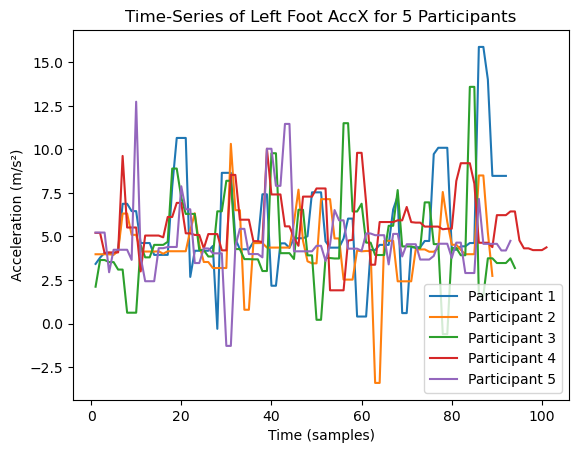

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. List your data files (one per participant)
files = [
    r"E:\PKNU_Data_2025\Aanlysis\Aanlysis_5nos\IMU\Angle_data\Angle_Kaleem(Manual)__WST_TUG_Kaleem__WST_TUG.xlsx",
    r"E:\PKNU_Data_2025\Aanlysis\Aanlysis_5nos\IMU\Angle_data\Angle_Muhammad(Manual)_WST_TUG2_Muhammad_WST_TUG.xlsx",
    r"E:\PKNU_Data_2025\Aanlysis\Aanlysis_5nos\IMU\Angle_data\Angle_Prathiksha(Manual)_WST_Prathiksha_WST.xlsx",
    r"E:\PKNU_Data_2025\Aanlysis\Aanlysis_5nos\IMU\Angle_data\Angle_Seondok(Manual)_WST_TUG_Seondok_WST_TUG.xlsx",
    r"E:\PKNU_Data_2025\Aanlysis\Aanlysis_5nos\IMU\Angle_data\Angle_Thathsara2(Maual)New_WST_TUG_Thathsara2(Maual)New_WST_TUG.xlsx"
]

# 2. Read each file into a separate pandas DataFrame
dataframes = [pd.read_excel(f) for f in files]

# 3. Plot the Left Foot AccX for each participant on the same figure
plt.figure()

for i, df in enumerate(dataframes):
    # If 'Time' column is missing, generate timestamps 1, 2, 3, ...
    if 'Time' not in df.columns:
        time_series = range(1, len(df) + 1)  # Generate 1, 2, 3, ...
    else:
        time_series = df['Time']

    plt.plot(time_series, df['L_AccX'], label=f'Participant {i+1}')

plt.xlabel('Time (samples)')
plt.ylabel('Acceleration (m/s²)')
plt.title('Time-Series of Left Foot AccX for 5 Participants')
plt.legend()
plt.show()


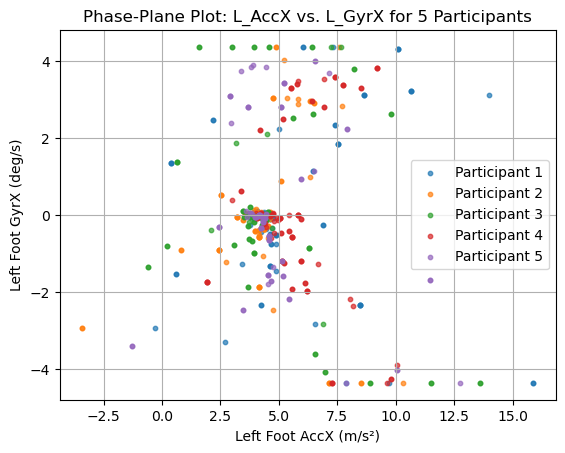

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. List of file paths for each participant
files = [
    r"E:\PKNU_Data_2025\Aanlysis\Aanlysis_5nos\IMU\Angle_data\Angle_Kaleem(Manual)__WST_TUG_Kaleem__WST_TUG.xlsx",
    r"E:\PKNU_Data_2025\Aanlysis\Aanlysis_5nos\IMU\Angle_data\Angle_Muhammad(Manual)_WST_TUG2_Muhammad_WST_TUG.xlsx",
    r"E:\PKNU_Data_2025\Aanlysis\Aanlysis_5nos\IMU\Angle_data\Angle_Prathiksha(Manual)_WST_Prathiksha_WST.xlsx",
    r"E:\PKNU_Data_2025\Aanlysis\Aanlysis_5nos\IMU\Angle_data\Angle_Seondok(Manual)_WST_TUG_Seondok_WST_TUG.xlsx",
    r"E:\PKNU_Data_2025\Aanlysis\Aanlysis_5nos\IMU\Angle_data\Angle_Thathsara2(Maual)New_WST_TUG_Thathsara2(Maual)New_WST_TUG.xlsx"
]

# 2. Read each file into a separate DataFrame
dataframes = [pd.read_excel(f) for f in files]

# 3. Create a single scatter plot (phase-plane)
plt.figure()

for i, df in enumerate(dataframes):
    # Extract acceleration & gyroscope columns for the left foot
    acc_x = df['L_AccX'].values
    gyr_x = df['L_GyrX'].values
    
    # Scatter each participant's data with a label
    plt.scatter(acc_x, gyr_x, s=10, alpha=0.7, label=f'Participant {i+1}')

plt.xlabel('Left Foot AccX (m/s²)')
plt.ylabel('Left Foot GyrX (deg/s)')
plt.title('Phase-Plane Plot: L_AccX vs. L_GyrX for 5 Participants')
plt.legend()
plt.grid(True)
plt.show()


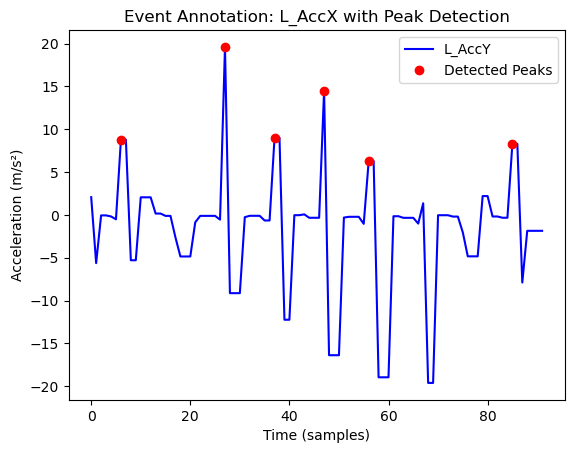

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

# Load one participant's data for demonstration
file_path = r"E:\PKNU_Data_2025\Aanlysis\Aanlysis_5nos\IMU\Angle_data\Angle_Kaleem(Manual)__WST_TUG_Kaleem__WST_TUG.xlsx"
df = pd.read_excel(file_path)

# If there's no time column, generate a sample index
if 'Time' in df.columns:
    time_series = df['Time']
else:
    time_series = range(len(df))

acc_signal = df['L_AccY'].values

# Find peaks with a height threshold (tune 'height' as needed)
peaks, properties = find_peaks(acc_signal, height=5)  # e.g., only peaks with height > 5 m/s²

plt.figure()
plt.plot(time_series, acc_signal, label='L_AccY', color='blue')
plt.plot(np.array(time_series)[peaks], acc_signal[peaks], 'ro', label='Detected Peaks')
plt.xlabel('Time (samples)')
plt.ylabel('Acceleration (m/s²)')
plt.title('Event Annotation: L_AccX with Peak Detection')
plt.legend()
plt.show()


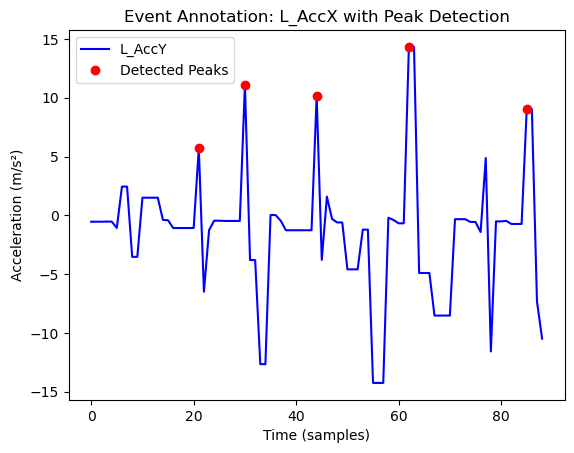

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

# Load one participant's data for demonstration
file_path = r"E:\PKNU_Data_2025\Aanlysis\Aanlysis_5nos\IMU\Angle_data\Angle_Muhammad(Manual)_WST_TUG2_Muhammad_WST_TUG.xlsx"
df = pd.read_excel(file_path)

# If there's no time column, generate a sample index
if 'Time' in df.columns:
    time_series = df['Time']
else:
    time_series = range(len(df))

acc_signal = df['L_AccY'].values

# Find peaks with a height threshold (tune 'height' as needed)
peaks, properties = find_peaks(acc_signal, height=5)  # e.g., only peaks with height > 5 m/s²

plt.figure()
plt.plot(time_series, acc_signal, label='L_AccY', color='blue')
plt.plot(np.array(time_series)[peaks], acc_signal[peaks], 'ro', label='Detected Peaks')
plt.xlabel('Time (samples)')
plt.ylabel('Acceleration (m/s²)')
plt.title('Event Annotation: L_AccX with Peak Detection')
plt.legend()
plt.show()


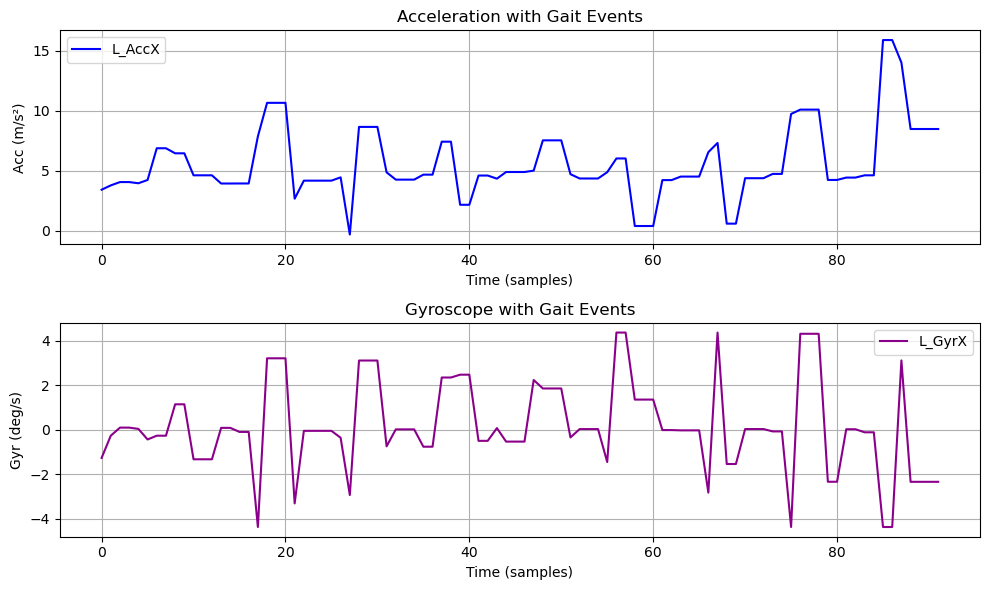

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load one participant's data
file_path = r"E:\PKNU_Data_2025\Aanlysis\Aanlysis_5nos\IMU\Angle_data\Angle_Kaleem(Manual)__WST_TUG_Kaleem__WST_TUG.xlsx"
df = pd.read_excel(file_path)

# 2. Create or retrieve time axis
if "Time" in df.columns:
    time_axis = df["Time"].values
else:
    # If there's no 'Time' column, create a simple index
    time_axis = np.arange(len(df))

# 3. Extract signals to plot
acc_signal = df["L_AccX"]  # or L_AccY, L_AccZ, R_AccX, etc.
gyr_signal = df["L_GyrX"]  # or L_GyrY, R_GyrZ, etc.

# 4. Identify event rows (if the column exists in your data)
#    We'll gather them into a dictionary for easy plotting.
#    Each event name => marker style
event_columns = {
    "HES": {"marker": "^", "color": "red"},   # Heel Strike
    "FOF": {"marker": "v", "color": "green"}, # Foot Off Floor (or toe-off)
    "HER": {"marker": "s", "color": "purple"},# Heel Rise (example naming)
    "TOF": {"marker": "o", "color": "orange"} # Toe Off
}

# 5. Plotting
plt.figure(figsize=(10, 6))

# --- Subplot 1: Acceleration ---
ax1 = plt.subplot(2, 1, 1)
ax1.plot(time_axis, acc_signal, label="L_AccX", color="blue")

# Scatter markers for each event if the column exists
for evt_name, style_dict in event_columns.items():
    if evt_name in df.columns:
        # Rows where event == 1
        evt_idx = df[evt_name] == 1  
        ax1.scatter(time_axis[evt_idx], acc_signal[evt_idx],
                    marker=style_dict["marker"],
                    color=style_dict["color"],
                    label=evt_name, s=50)

ax1.set_title("Acceleration with Gait Events")
ax1.set_xlabel("Time (samples)")
ax1.set_ylabel("Acc (m/s²)")
ax1.legend()
ax1.grid(True)

# --- Subplot 2: Gyroscope ---
ax2 = plt.subplot(2, 1, 2, sharex=ax1)
ax2.plot(time_axis, gyr_signal, label="L_GyrX", color="darkmagenta")

# Same event markers for gyroscope subplot
for evt_name, style_dict in event_columns.items():
    if evt_name in df.columns:
        evt_idx = df[evt_name] == 1
        ax2.scatter(time_axis[evt_idx], gyr_signal[evt_idx],
                    marker=style_dict["marker"],
                    color=style_dict["color"],
                    label=evt_name, s=50)

ax2.set_title("Gyroscope with Gait Events")
ax2.set_xlabel("Time (samples)")
ax2.set_ylabel("Gyr (deg/s)")  # or rad/s depending on your sensor
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


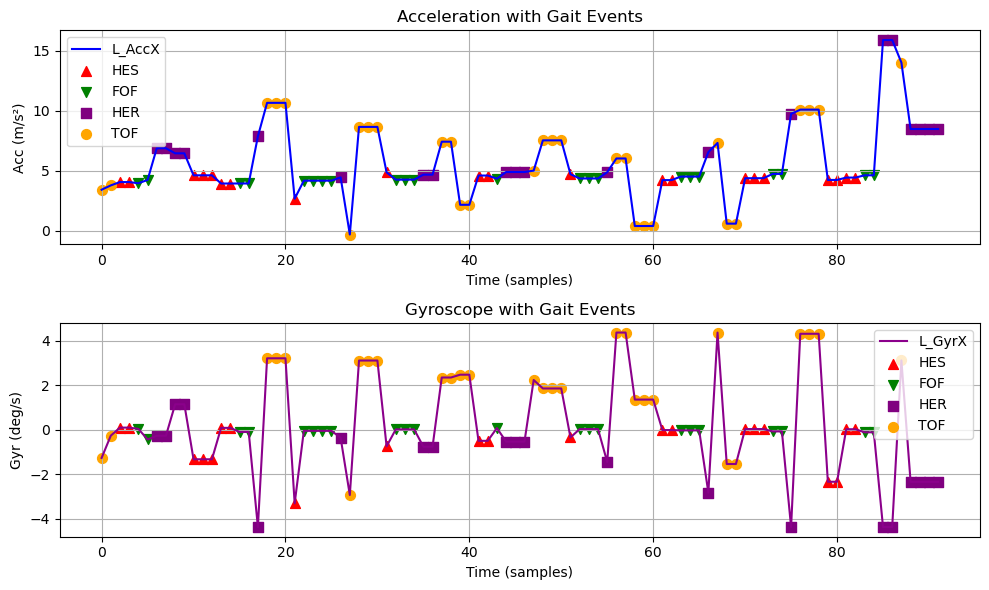

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
file_path = r"E:\PKNU_Data_2025\Aanlysis\Aanlysis_5nos\IMU\Angle_data\Angle_Kaleem(Manual)__WST_TUG_Kaleem__WST_TUG.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Fix Timestamp if needed
if "Timestamp" in df.columns:
    df["Timestamp"] = df["Timestamp"].astype(str).str.replace("'", "")  # Remove leading apostrophe

# Create time axis (use Timestamp if available, else use index)
time_axis = np.arange(len(df))  # Default if timestamp is not useful
if "Timestamp" in df.columns:
    df["Time"] = pd.to_datetime(df["Timestamp"], errors='coerce')  # Convert to datetime
    time_axis = np.arange(len(df))  # You can change this to df["Time"] if timestamps are valid

# Extract acceleration and gyroscope signals
acc_signal = df["L_AccX"]
gyr_signal = df["L_GyrX"]

# Define gait events from 'L_GAIT' column
event_types = ["HES", "FOF", "HER", "TOF"]
event_markers = {"HES": "^", "FOF": "v", "HER": "s", "TOF": "o"}  # Marker shapes
event_colors = {"HES": "red", "FOF": "green", "HER": "purple", "TOF": "orange"}  # Colors

# Create plots
plt.figure(figsize=(10, 6))

# --- Subplot 1: Acceleration ---
ax1 = plt.subplot(2, 1, 1)
ax1.plot(time_axis, acc_signal, label="L_AccX", color="blue")

# Plot gait event markers
for event in event_types:
    event_indices = df.index[df["L_GAIT"] == event].tolist()
    ax1.scatter(time_axis[event_indices], acc_signal[event_indices],
                marker=event_markers[event], color=event_colors[event], 
                label=event, s=50)

ax1.set_title("Acceleration with Gait Events")
ax1.set_xlabel("Time (samples)")
ax1.set_ylabel("Acc (m/s²)")
ax1.legend()
ax1.grid(True)

# --- Subplot 2: Gyroscope ---
ax2 = plt.subplot(2, 1, 2, sharex=ax1)
ax2.plot(time_axis, gyr_signal, label="L_GyrX", color="darkmagenta")

# Plot gait event markers on Gyroscope signal
for event in event_types:
    event_indices = df.index[df["L_GAIT"] == event].tolist()
    ax2.scatter(time_axis[event_indices], gyr_signal[event_indices],
                marker=event_markers[event], color=event_colors[event], 
                label=event, s=50)

ax2.set_title("Gyroscope with Gait Events")
ax2.set_xlabel("Time (samples)")
ax2.set_ylabel("Gyr (deg/s)")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


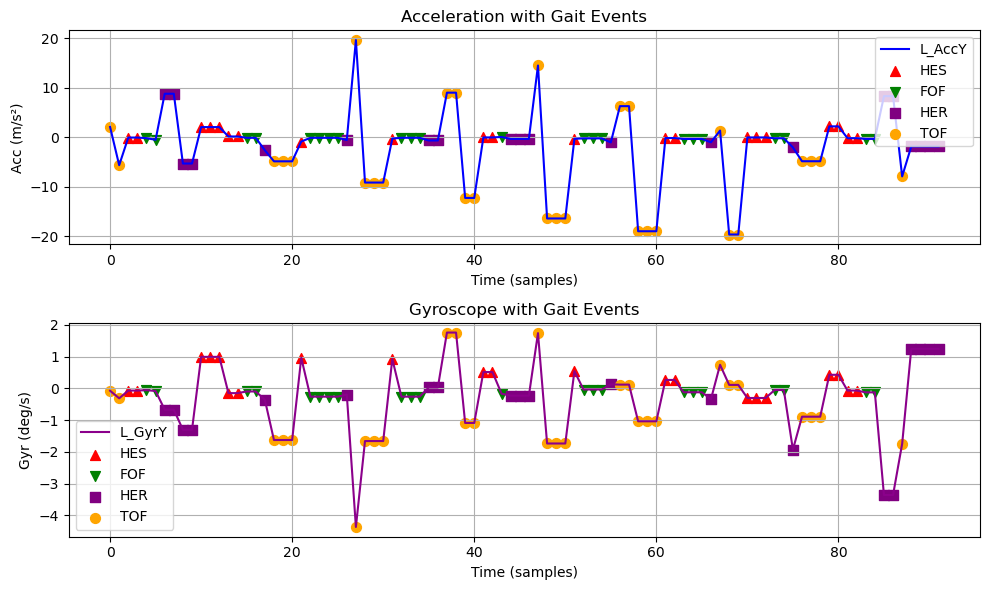

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
file_path = r"E:\PKNU_Data_2025\Aanlysis\Aanlysis_5nos\IMU\Angle_data\Angle_Kaleem(Manual)__WST_TUG_Kaleem__WST_TUG.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Fix Timestamp if needed
if "Timestamp" in df.columns:
    df["Timestamp"] = df["Timestamp"].astype(str).str.replace("'", "")  # Remove leading apostrophe

# Create time axis (use Timestamp if available, else use index)
time_axis = np.arange(len(df))  # Default if timestamp is not useful
if "Timestamp" in df.columns:
    df["Time"] = pd.to_datetime(df["Timestamp"], errors='coerce')  # Convert to datetime
    time_axis = np.arange(len(df))  # You can change this to df["Time"] if timestamps are valid

# Extract acceleration and gyroscope signals
acc_signal = df["L_AccY"]
gyr_signal = df["L_GyrY"]

# Define gait events from 'L_GAIT' column
event_types = ["HES", "FOF", "HER", "TOF"]
event_markers = {"HES": "^", "FOF": "v", "HER": "s", "TOF": "o"}  # Marker shapes
event_colors = {"HES": "red", "FOF": "green", "HER": "purple", "TOF": "orange"}  # Colors

# Create plots
plt.figure(figsize=(10, 6))

# --- Subplot 1: Acceleration ---
ax1 = plt.subplot(2, 1, 1)
ax1.plot(time_axis, acc_signal, label="L_AccY", color="blue")

# Plot gait event markers
for event in event_types:
    event_indices = df.index[df["L_GAIT"] == event].tolist()
    ax1.scatter(time_axis[event_indices], acc_signal[event_indices],
                marker=event_markers[event], color=event_colors[event], 
                label=event, s=50)

ax1.set_title("Acceleration with Gait Events")
ax1.set_xlabel("Time (samples)")
ax1.set_ylabel("Acc (m/s²)")
ax1.legend()
ax1.grid(True)

# --- Subplot 2: Gyroscope ---
ax2 = plt.subplot(2, 1, 2, sharex=ax1)
ax2.plot(time_axis, gyr_signal, label="L_GyrY", color="darkmagenta")

# Plot gait event markers on Gyroscope signal
for event in event_types:
    event_indices = df.index[df["L_GAIT"] == event].tolist()
    ax2.scatter(time_axis[event_indices], gyr_signal[event_indices],
                marker=event_markers[event], color=event_colors[event], 
                label=event, s=50)

ax2.set_title("Gyroscope with Gait Events")
ax2.set_xlabel("Time (samples)")
ax2.set_ylabel("Gyr (deg/s)")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


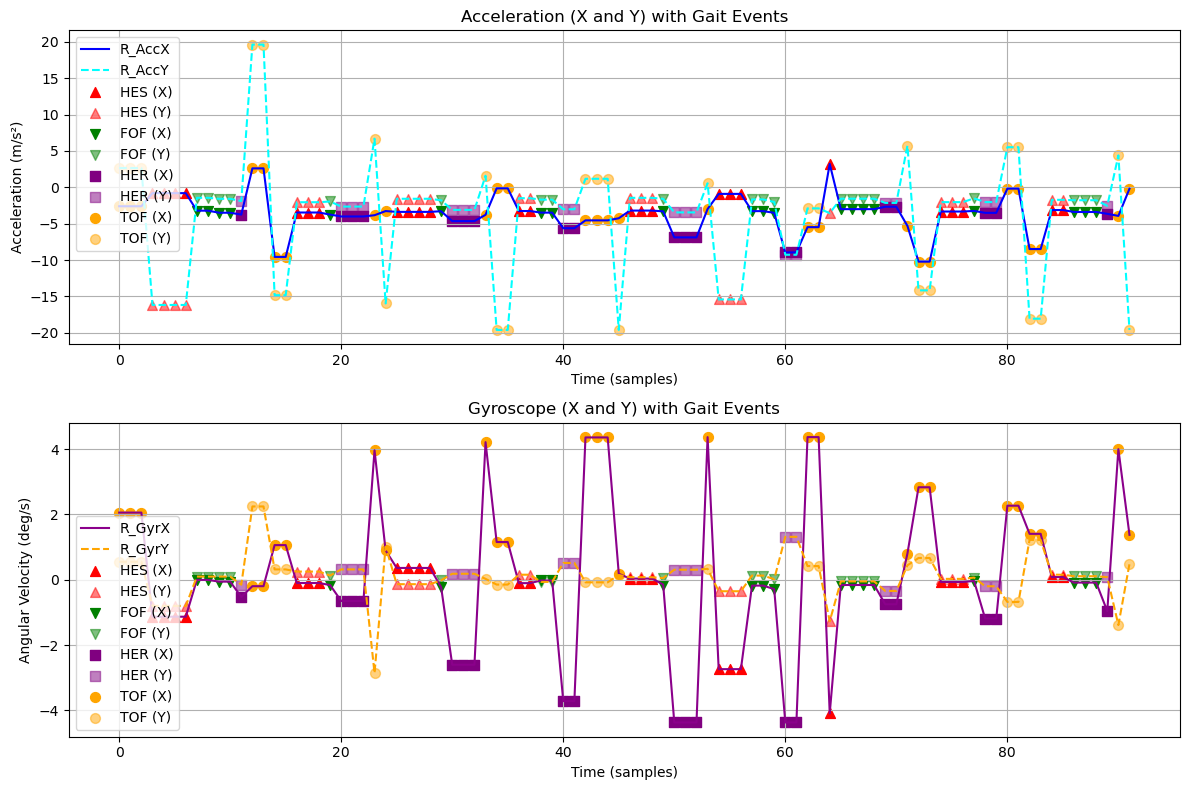

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
file_path = r"E:\PKNU_Data_2025\Aanlysis\Aanlysis_5nos\IMU\Angle_data\Angle_Kaleem(Manual)__WST_TUG_Kaleem__WST_TUG.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Fix Timestamp if needed
if "Timestamp" in df.columns:
    df["Timestamp"] = df["Timestamp"].astype(str).str.replace("'", "")  # Remove leading apostrophe

# Create time axis (use Timestamp if available, else use index)
time_axis = np.arange(len(df))  # Default if timestamp is not useful
if "Timestamp" in df.columns:
    df["Time"] = pd.to_datetime(df["Timestamp"], errors='coerce')  # Convert to datetime
    time_axis = np.arange(len(df))  # You can change this to df["Time"] if timestamps are valid

# Extract acceleration and gyroscope signals (both X and Y axes)
acc_signal_x = df["R_AccX"]
acc_signal_y = df["R_AccY"]
gyr_signal_x = df["R_GyrX"]
gyr_signal_y = df["R_GyrY"]

# Define gait events from 'L_GAIT' column
event_types = ["HES", "FOF", "HER", "TOF"]
event_markers = {"HES": "^", "FOF": "v", "HER": "s", "TOF": "o"}  # Marker shapes
event_colors = {"HES": "red", "FOF": "green", "HER": "purple", "TOF": "orange"}  # Colors

# Create plots
plt.figure(figsize=(12, 8))

# --- Subplot 1: Acceleration (X and Y) ---
ax1 = plt.subplot(2, 1, 1)
ax1.plot(time_axis, acc_signal_x, label="R_AccX", color="blue")
ax1.plot(time_axis, acc_signal_y, label="R_AccY", color="cyan", linestyle="dashed")

# Plot gait event markers
for event in event_types:
    event_indices = df.index[df["R_GAIT"] == event].tolist()
    ax1.scatter(time_axis[event_indices], acc_signal_x[event_indices],
                marker=event_markers[event], color=event_colors[event], 
                label=f"{event} (X)", s=50)
    ax1.scatter(time_axis[event_indices], acc_signal_y[event_indices],
                marker=event_markers[event], color=event_colors[event], 
                label=f"{event} (Y)", s=50, alpha=0.5)

ax1.set_title("Acceleration (X and Y) with Gait Events")
ax1.set_xlabel("Time (samples)")
ax1.set_ylabel("Acceleration (m/s²)")
ax1.legend()
ax1.grid(True)

# --- Subplot 2: Gyroscope (X and Y) ---
ax2 = plt.subplot(2, 1, 2, sharex=ax1)
ax2.plot(time_axis, gyr_signal_x, label="R_GyrX", color="darkmagenta")
ax2.plot(time_axis, gyr_signal_y, label="R_GyrY", color="orange", linestyle="dashed")

# Plot gait event markers
for event in event_types:
    event_indices = df.index[df["R_GAIT"] == event].tolist()
    ax2.scatter(time_axis[event_indices], gyr_signal_x[event_indices],
                marker=event_markers[event], color=event_colors[event], 
                label=f"{event} (X)", s=50)
    ax2.scatter(time_axis[event_indices], gyr_signal_y[event_indices],
                marker=event_markers[event], color=event_colors[event], 
                label=f"{event} (Y)", s=50, alpha=0.5)

ax2.set_title("Gyroscope (X and Y) with Gait Events")
ax2.set_xlabel("Time (samples)")
ax2.set_ylabel("Angular Velocity (deg/s)")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


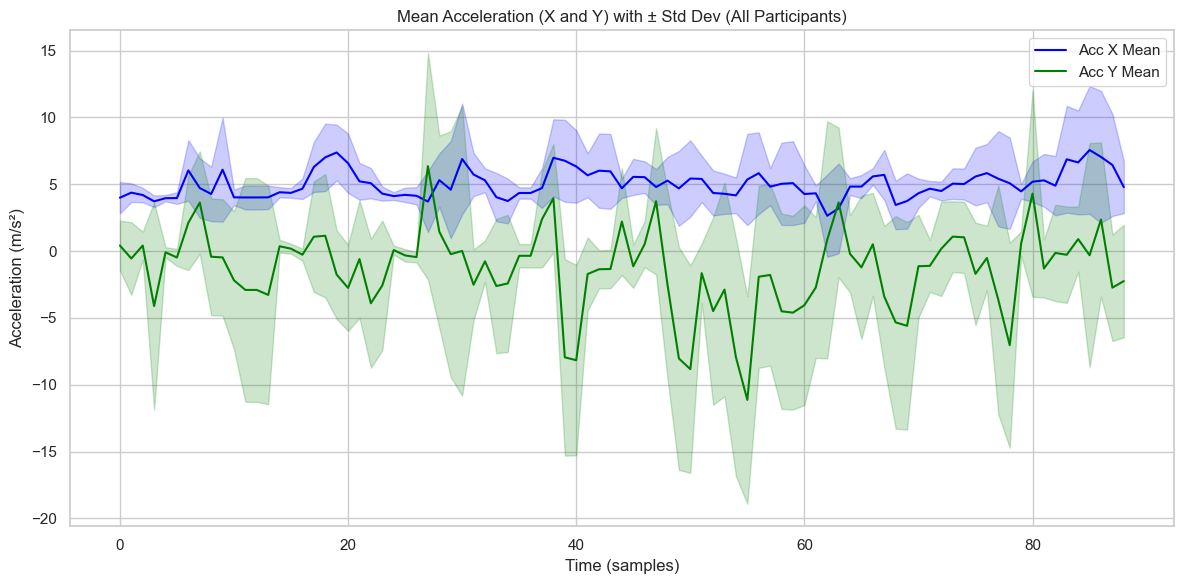

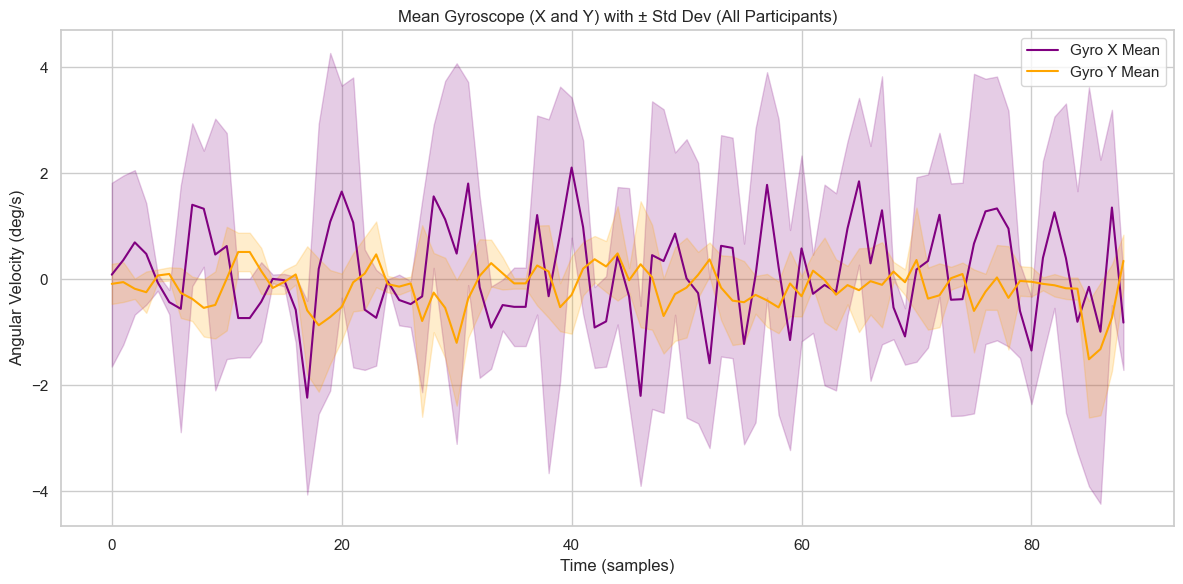

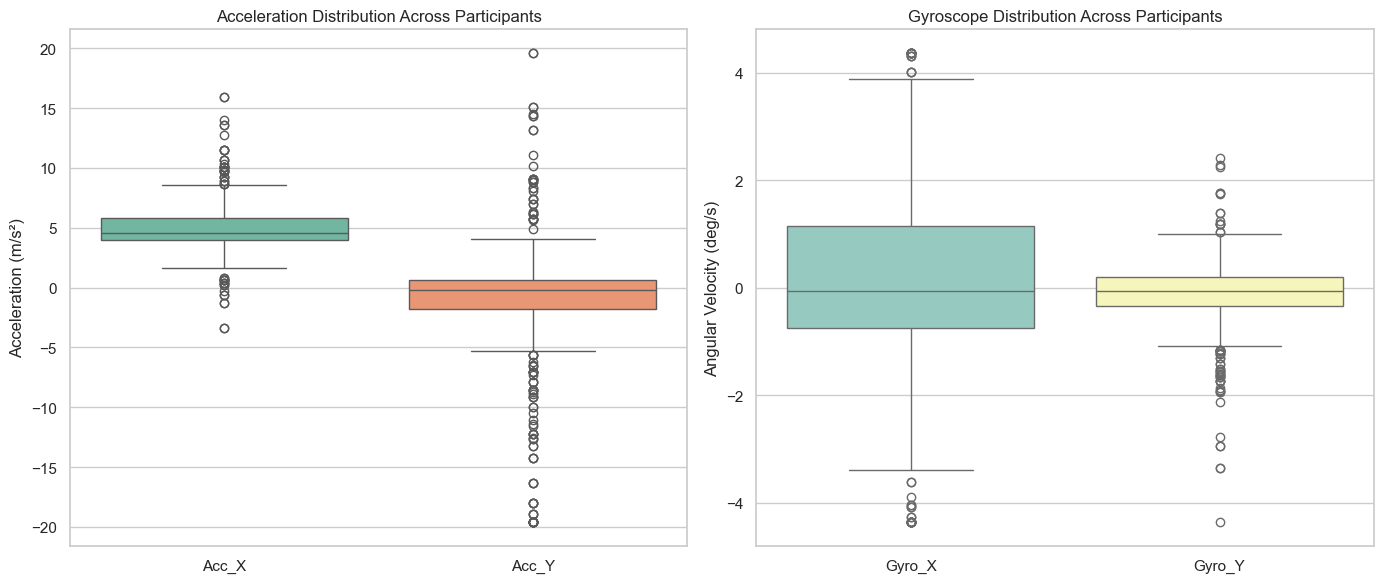

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to your participant datasets
files = [
    r"E:\PKNU_Data_2025\Aanlysis\Aanlysis_5nos\IMU\Angle_data\Angle_Kaleem(Manual)__WST_TUG_Kaleem__WST_TUG.xlsx",
    r"E:\PKNU_Data_2025\Aanlysis\Aanlysis_5nos\IMU\Angle_data\Angle_Muhammad(Manual)_WST_TUG2_Muhammad_WST_TUG.xlsx",
    r"E:\PKNU_Data_2025\Aanlysis\Aanlysis_5nos\IMU\Angle_data\Angle_Prathiksha(Manual)_WST_Prathiksha_WST.xlsx",
    r"E:\PKNU_Data_2025\Aanlysis\Aanlysis_5nos\IMU\Angle_data\Angle_Seondok(Manual)_WST_TUG_Seondok_WST_TUG.xlsx",
    r"E:\PKNU_Data_2025\Aanlysis\Aanlysis_5nos\IMU\Angle_data\Angle_Thathsara2(Maual)New_WST_TUG_Thathsara2(Maual)New_WST_TUG.xlsx"
]

# Load datasets into list
dfs = [pd.read_excel(f, sheet_name="Sheet1") for f in files]

# Generate standardized timestamps for each participant
time_axis = np.arange(min(len(df) for df in dfs))

# Prepare data arrays (truncate data to same length)
acc_x = np.array([df['L_AccX'][:len(time_axis)] for df in dfs])
acc_y = np.array([df['L_AccY'][:len(time_axis)] for df in dfs])
gyr_x = np.array([df['L_GyrX'][:len(time_axis)] for df in dfs])
gyr_y = np.array([df['L_GyrY'][:len(time_axis)] for df in dfs])

# Compute mean and std deviation across participants
def mean_std(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    return mean, std

acc_x_mean, acc_x_std = mean_std(acc_x)
acc_y_mean, acc_y_std = mean_std(acc_y)
gyr_x_mean, gyr_x_std = mean_std(gyr_x)
gyr_y_mean, gyr_y_std = mean_std(gyr_y)

# Plot style
sns.set(style="whitegrid")

# ---- Figure 1: Acceleration Data ---- #
plt.figure(figsize=(12,6))
plt.plot(time_axis, acc_x_mean, label='Acc X Mean', color='blue')
plt.fill_between(time_axis, acc_x_mean - acc_x_std, acc_x_mean + acc_x_std, color='blue', alpha=0.2)

plt.plot(time_axis, acc_y_mean, label='Acc Y Mean', color='green')
plt.fill_between(time_axis, acc_y_mean - acc_y_std, acc_y_mean + acc_y_std, color='green', alpha=0.2)

plt.title('Mean Acceleration (X and Y) with ± Std Dev (All Participants)')
plt.xlabel('Time (samples)')
plt.ylabel('Acceleration (m/s²)')
plt.legend()
plt.tight_layout()
plt.show()

# ---- Figure 2: Gyroscope Data ---- #
plt.figure(figsize=(12,6))
plt.plot(time_axis, gyr_x_mean, label='Gyro X Mean', color='purple')
plt.fill_between(time_axis, gyr_x_mean - gyr_x_std, gyr_x_mean + gyr_x_std, color='purple', alpha=0.2)

plt.plot(time_axis, gyr_y_mean, label='Gyro Y Mean', color='orange')
plt.fill_between(time_axis, gyr_y_mean - gyr_y_std, gyr_y_mean + gyr_y_std, color='orange', alpha=0.2)

plt.title('Mean Gyroscope (X and Y) with ± Std Dev (All Participants)')
plt.xlabel('Time (samples)')
plt.ylabel('Angular Velocity (deg/s)')
plt.legend()
plt.tight_layout()
plt.show()

# ---- Figure 3: Boxplots for Distribution Analysis ---- #
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Acceleration boxplot
acc_df = pd.DataFrame({
    'Acc_X': acc_x.flatten(),
    'Acc_Y': acc_y.flatten()
})
sns.boxplot(data=acc_df, ax=axes[0], palette="Set2")
axes[0].set_title('Acceleration Distribution Across Participants')
axes[0].set_ylabel('Acceleration (m/s²)')

# Gyroscope boxplot
gyr_df = pd.DataFrame({
    'Gyro_X': gyr_x.flatten(),
    'Gyro_Y': gyr_y.flatten()
})
sns.boxplot(data=gyr_df, ax=axes[1], palette="Set3")
axes[1].set_title('Gyroscope Distribution Across Participants')
axes[1].set_ylabel('Angular Velocity (deg/s)')

plt.tight_layout()
plt.show()


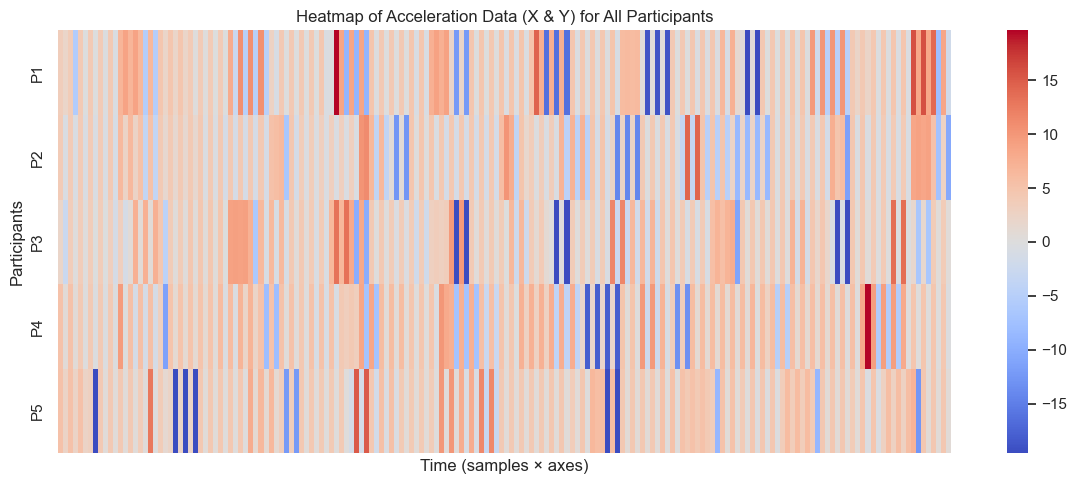

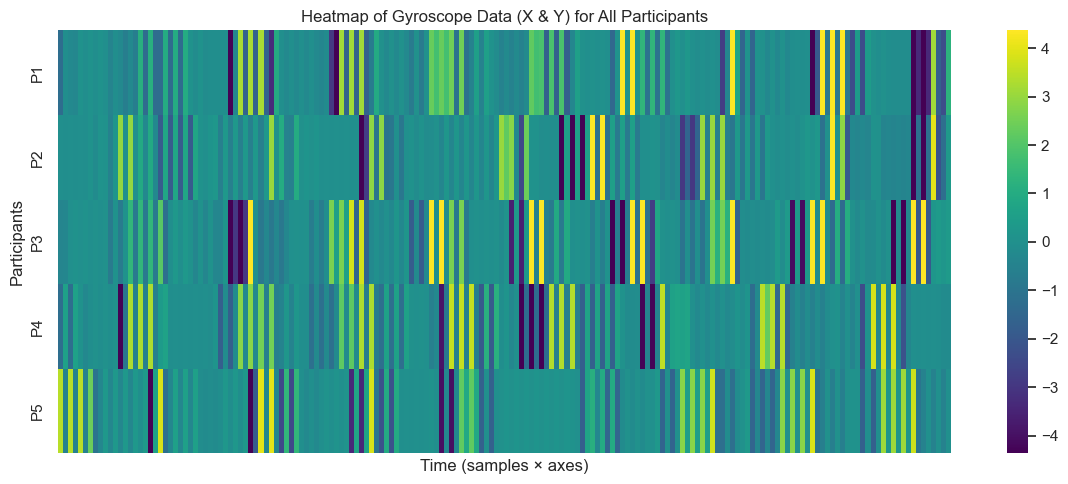

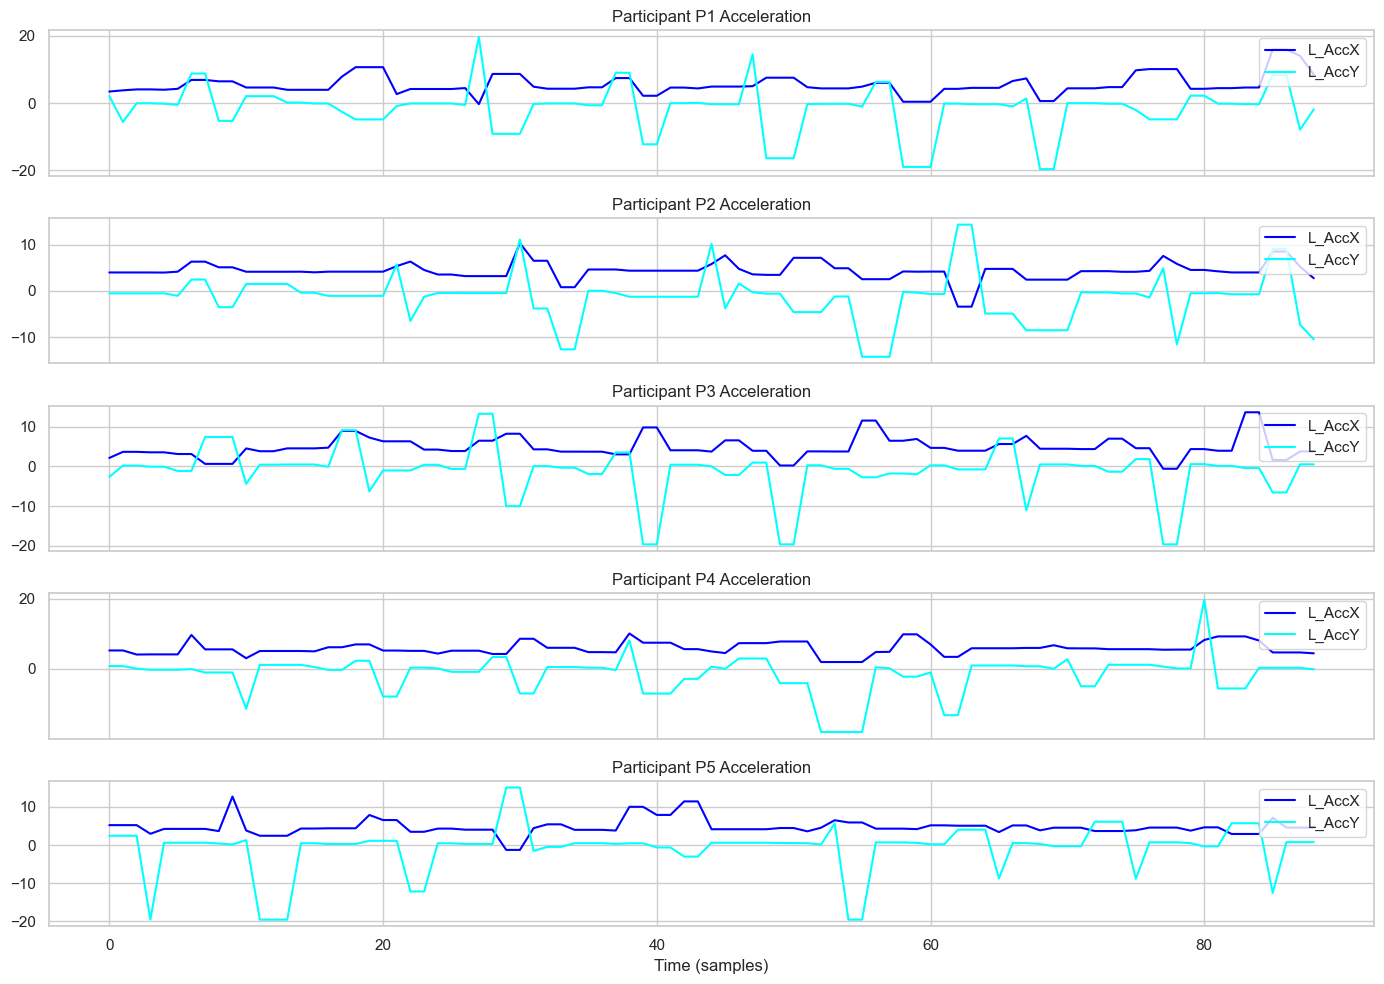

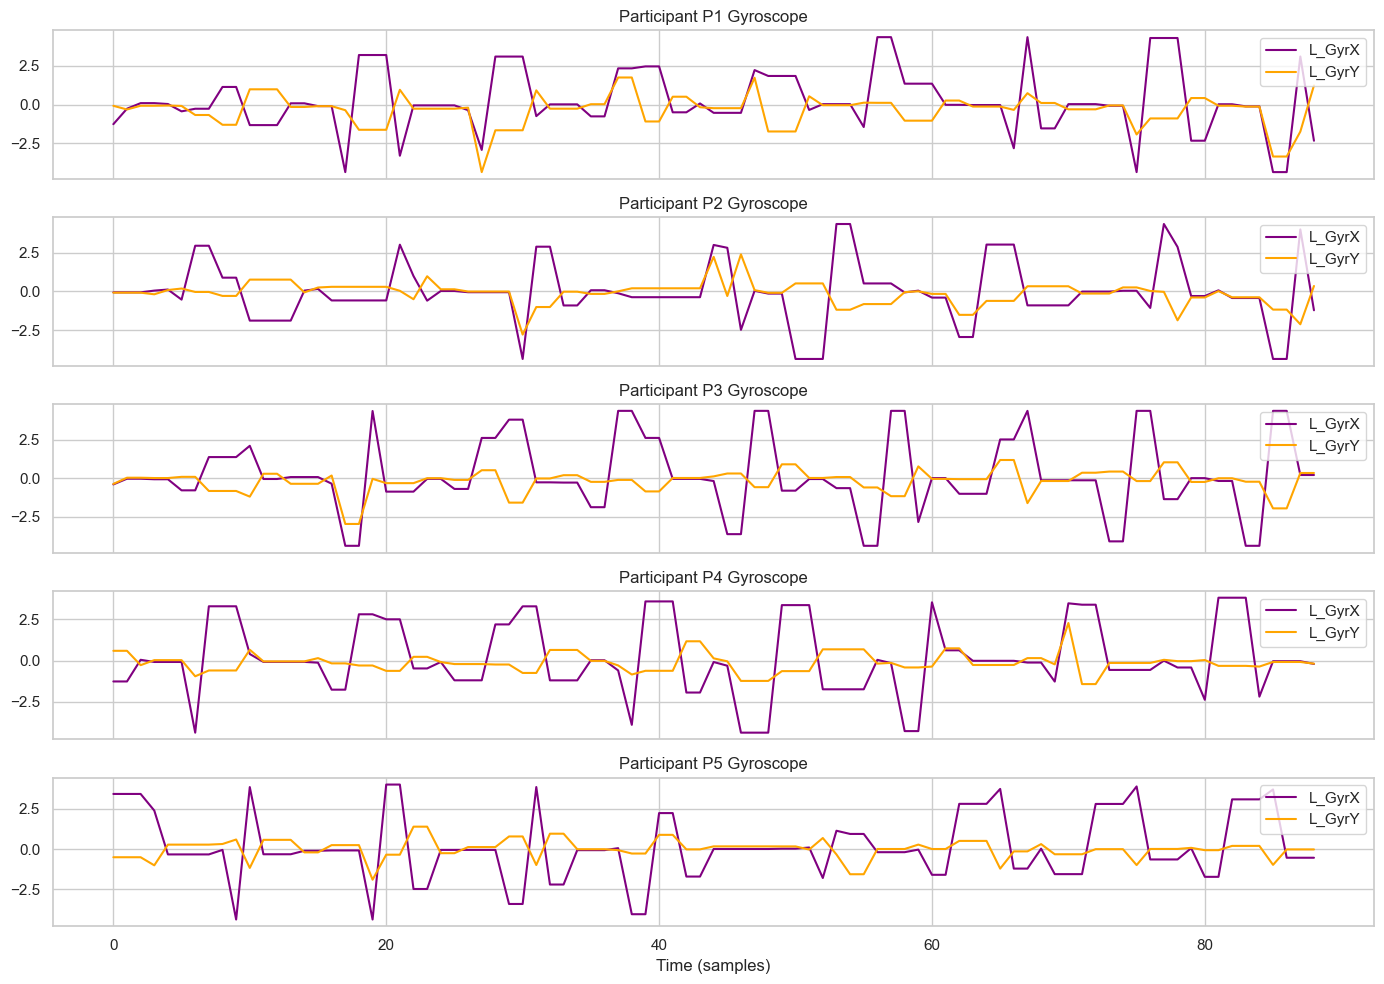

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# File paths (replace with actual paths)
files = [
    r"E:\PKNU_Data_2025\Aanlysis\Aanlysis_5nos\IMU\Angle_data\Angle_Kaleem(Manual)__WST_TUG_Kaleem__WST_TUG.xlsx",
    r"E:\PKNU_Data_2025\Aanlysis\Aanlysis_5nos\IMU\Angle_data\Angle_Muhammad(Manual)_WST_TUG2_Muhammad_WST_TUG.xlsx",
    r"E:\PKNU_Data_2025\Aanlysis\Aanlysis_5nos\IMU\Angle_data\Angle_Prathiksha(Manual)_WST_Prathiksha_WST.xlsx",
    r"E:\PKNU_Data_2025\Aanlysis\Aanlysis_5nos\IMU\Angle_data\Angle_Seondok(Manual)_WST_TUG_Seondok_WST_TUG.xlsx",
    r"E:\PKNU_Data_2025\Aanlysis\Aanlysis_5nos\IMU\Angle_data\Angle_Thathsara2(Maual)New_WST_TUG_Thathsara2(Maual)New_WST_TUG.xlsx"
]

participant_names = ['P1', 'P2', 'P3', 'P4', 'P5']

# Load data
dfs = [pd.read_excel(f, sheet_name="Sheet1") for f in files]
min_length = min(len(df) for df in dfs)
time_axis = np.arange(min_length)

# Combine data into arrays
acc_data = np.array([df[['L_AccX', 'L_AccY']].iloc[:min_length].values.flatten() for df in dfs])
gyr_data = np.array([df[['L_GyrX', 'L_GyrY']].iloc[:min_length].values.flatten() for df in dfs])

# ---- Figure 1: Acceleration Heatmap ---- #
plt.figure(figsize=(12, 5))
sns.heatmap(acc_data, cmap='coolwarm', xticklabels=False, yticklabels=participant_names, cbar=True)
plt.title('Heatmap of Acceleration Data (X & Y) for All Participants')
plt.ylabel('Participants')
plt.xlabel('Time (samples × axes)')
plt.tight_layout()
plt.show()

# ---- Figure 2: Gyroscope Heatmap ---- #
plt.figure(figsize=(12, 5))
sns.heatmap(gyr_data, cmap='viridis', xticklabels=False, yticklabels=participant_names, cbar=True)
plt.title('Heatmap of Gyroscope Data (X & Y) for All Participants')
plt.ylabel('Participants')
plt.xlabel('Time (samples × axes)')
plt.tight_layout()
plt.show()

# ---- Figure 3: Individual Participant Subplots (Acceleration) ---- #
fig, axes = plt.subplots(len(dfs), 1, figsize=(14, 10), sharex=True)

for i, df in enumerate(dfs):
    axes[i].plot(time_axis, df['L_AccX'][:min_length], label='L_AccX', color='blue')
    axes[i].plot(time_axis, df['L_AccY'][:min_length], label='L_AccY', color='cyan')
    axes[i].set_title(f'Participant {participant_names[i]} Acceleration')
    axes[i].legend(loc='upper right')
    axes[i].grid(True)

plt.xlabel('Time (samples)')
plt.tight_layout()
plt.show()

# ---- Figure 4: Individual Participant Subplots (Gyroscope) ---- #
fig, axes = plt.subplots(len(dfs), 1, figsize=(14, 10), sharex=True)

for i, df in enumerate(dfs):
    axes[i].plot(time_axis, df['L_GyrX'][:min_length], label='L_GyrX', color='purple')
    axes[i].plot(time_axis, df['L_GyrY'][:min_length], label='L_GyrY', color='orange')
    axes[i].set_title(f'Participant {participant_names[i]} Gyroscope')
    axes[i].legend(loc='upper right')
    axes[i].grid(True)

plt.xlabel('Time (samples)')
plt.tight_layout()
plt.show()


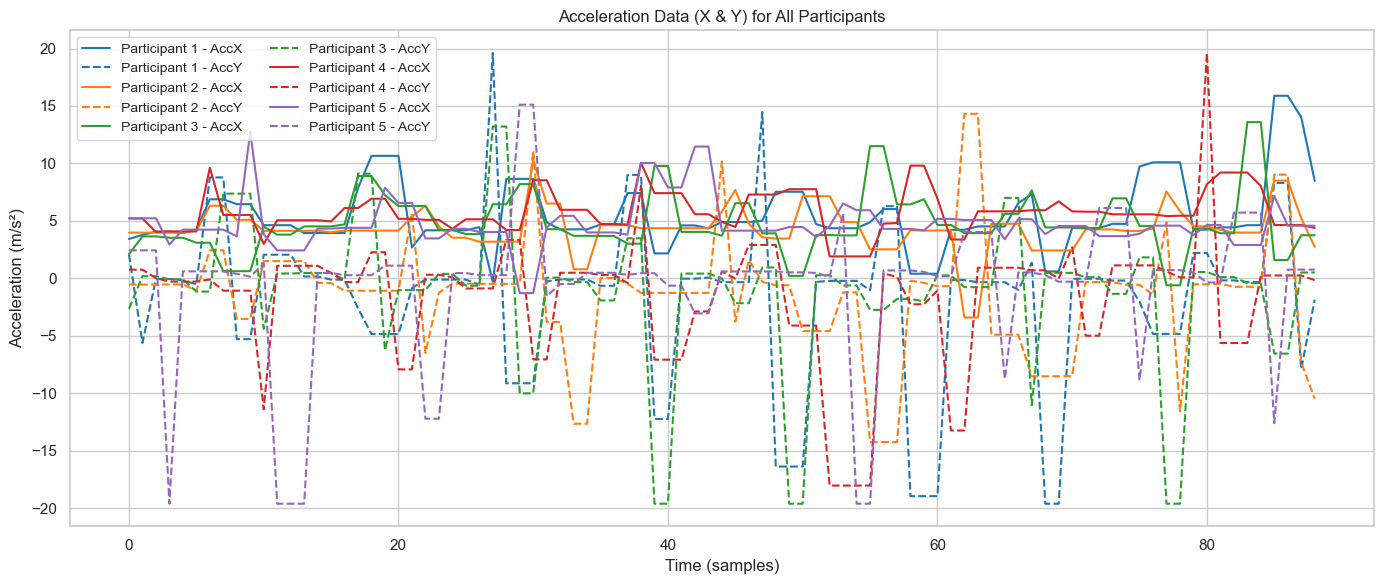

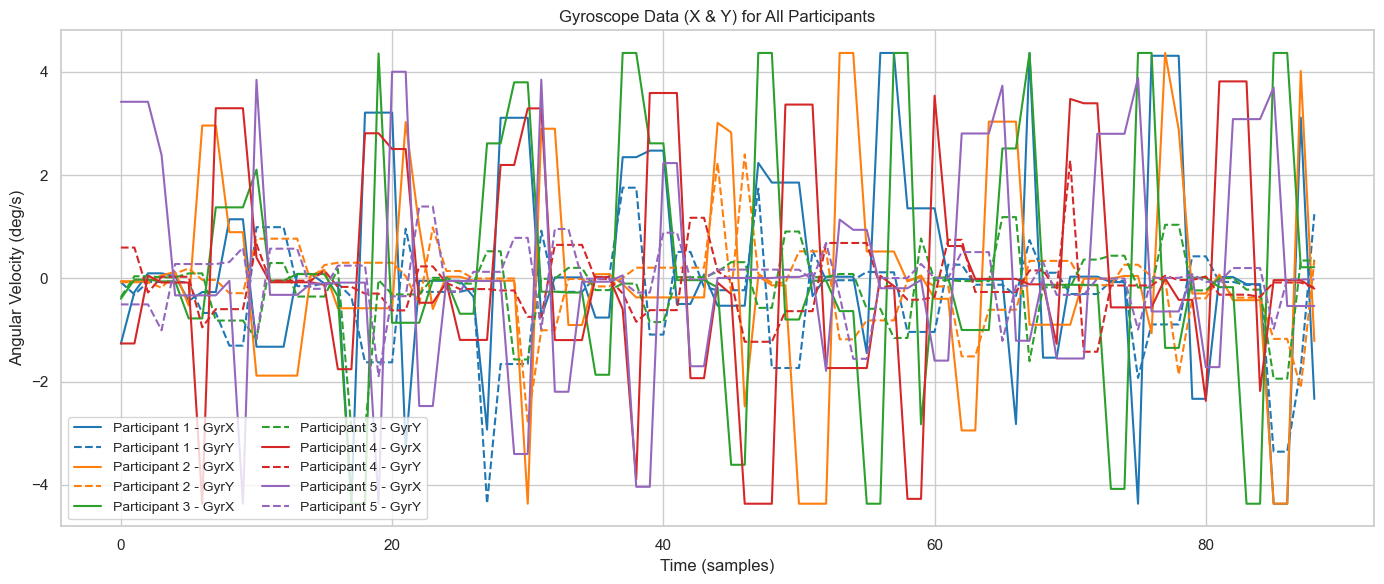

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# File paths (replace with your actual paths)
files = [
    r"E:\PKNU_Data_2025\Aanlysis\Aanlysis_5nos\IMU\Angle_data\Angle_Kaleem(Manual)__WST_TUG_Kaleem__WST_TUG.xlsx",
    r"E:\PKNU_Data_2025\Aanlysis\Aanlysis_5nos\IMU\Angle_data\Angle_Muhammad(Manual)_WST_TUG2_Muhammad_WST_TUG.xlsx",
    r"E:\PKNU_Data_2025\Aanlysis\Aanlysis_5nos\IMU\Angle_data\Angle_Prathiksha(Manual)_WST_Prathiksha_WST.xlsx",
    r"E:\PKNU_Data_2025\Aanlysis\Aanlysis_5nos\IMU\Angle_data\Angle_Seondok(Manual)_WST_TUG_Seondok_WST_TUG.xlsx",
    r"E:\PKNU_Data_2025\Aanlysis\Aanlysis_5nos\IMU\Angle_data\Angle_Thathsara2(Maual)New_WST_TUG_Thathsara2(Maual)New_WST_TUG.xlsx"
]

participant_names = ['Participant 1', 'Participant 2', 'Participant 3', 'Participant 4', 'Participant 5']
colors = sns.color_palette("tab10", len(files))

# Load data
dfs = [pd.read_excel(f, sheet_name="Sheet1") for f in files]
min_length = min(len(df) for df in dfs)
time_axis = np.arange(min_length)

# ---- Figure 1: All Participants Acceleration ---- #
plt.figure(figsize=(14, 6))

for idx, df in enumerate(dfs):
    plt.plot(time_axis, df['L_AccX'][:min_length], label=f'{participant_names[idx]} - AccX', color=colors[idx], linestyle='-')
    plt.plot(time_axis, df['L_AccY'][:min_length], label=f'{participant_names[idx]} - AccY', color=colors[idx], linestyle='--')

plt.title('Acceleration Data (X & Y) for All Participants')
plt.xlabel('Time (samples)')
plt.ylabel('Acceleration (m/s²)')
plt.legend(ncol=2, fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

# ---- Figure 2: All Participants Gyroscope ---- #
plt.figure(figsize=(14, 6))

for idx, df in enumerate(dfs):
    plt.plot(time_axis, df['L_GyrX'][:min_length], label=f'{participant_names[idx]} - GyrX', color=colors[idx], linestyle='-')
    plt.plot(time_axis, df['L_GyrY'][:min_length], label=f'{participant_names[idx]} - GyrY', color=colors[idx], linestyle='--')

plt.title('Gyroscope Data (X & Y) for All Participants')
plt.xlabel('Time (samples)')
plt.ylabel('Angular Velocity (deg/s)')
plt.legend(ncol=2, fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()
